<a href="https://colab.research.google.com/github/anuva05/PracticalDeepLearningCourse/blob/master/AudioClassificationExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
from fastai import *

Let's take a single channel audio clip with sample rate = 44,100 Hz. If we look at the first 3 seconds of this clip, we are looking at 3*44100 = 132300 samples.

We get audio data from FMA, an interactive library of high-quality, legal audio downloads. Data downloaded from: https://github.com/mdeff/fma 

In [4]:
!curl -O https://os.unil.cloud.switch.ch/fma/fma_small.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7323M  100 7323M    0     0  26.4M      0  0:04:36  0:04:36 --:--:-- 27.3M


In [5]:
!curl -O https://os.unil.cloud.switch.ch/fma/fma_metadata.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  341M  100  341M    0     0  22.8M      0  0:00:14  0:00:14 --:--:-- 26.5M


In [0]:
!unzip fma_metadata.zip
!unzip fma_small.zip

In [0]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

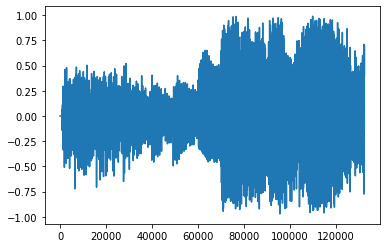

In [16]:
filename = 'fma_small/150/150064.mp3'
clip, sample_rate = librosa.load(filename, sr=None)
clip = clip[:132300] # first three seconds of file
plt.plot(clip)

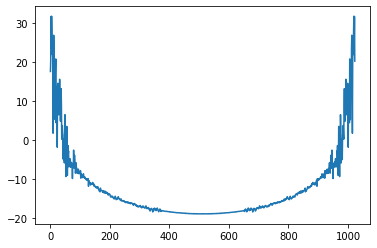

In [21]:
n_fft = 1024  # frame length 
start = 45000 # start at a part of the sound thats not silence
x = clip[start:start+n_fft]
X = np.fft.fft(x, n_fft)
X_magnitude, X_phase = librosa.magphase(X)
X_magnitude_db = librosa.amplitude_to_db(X_magnitude)
plt.plot(X_magnitude_db)

This is how we take spectrograms..

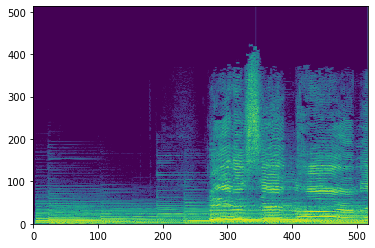

In [24]:
hop_length= 256
stft = librosa.stft(clip, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude)
plt.pcolormesh(stft_magnitude_db)

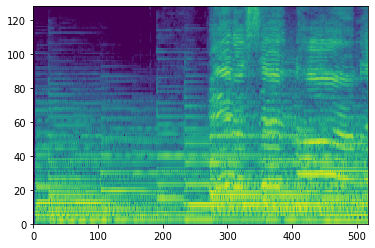

In [30]:
n_mels =128
fmin = 20 
fmax = 10000
mel_spec = librosa.feature.melspectrogram(clip, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, sr=sample_rate, power=1.0, fmin=fmin, fmax=fmax)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.pcolormesh(mel_spec_db)

#Classifying with Fast.ai

In [0]:
n_fft = 1024
hop_length = 256
n_mels = 128
f_min = 20
f_max = 10000
sample_rate = 16000